# Import Data
Import two csv files and read it

In [205]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
plt.rcdefaults()
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="ticks", color_codes=True)


crueltyfree = pd.read_csv("sephora_CF.csv")

In [206]:
noncrueltyfree = pd.read_csv("sephora_nonCF.csv")

# Clean Data Using Regular Expression

#### Reviews
Reviews appears "xx reviews". Remove "reviews" string then convert to interger. 

In [207]:
# remove "reviews" string and convert to interger
crueltyfree['num_reviews']=crueltyfree['num_reviews'].str.extract('(\d+)').astype(int)
# run crueltyfree['num_reviews'].str.extract('(\d+)') first, then run .astype(int) and assign back to the variable last

In [208]:
noncrueltyfree['num_reviews']=noncrueltyfree['num_reviews'].str.extract('(\d+)').astype(int)

#### Price
Some colmun shows value set's total worth so need to remove everything after "\r" and remove dollar sign $

In [209]:
# split by the string \r and keep just str[0] since that's the price
crueltyfree['price']= crueltyfree['price'].str.split('\r').str[0]

In [210]:
noncrueltyfree['price']=noncrueltyfree['price'].str.split('\r').str[0]

In [211]:
# remove dollar sign
crueltyfree['price']=[x.strip('$') for x in crueltyfree.price]

In [212]:
noncrueltyfree['price']=[x.strip('$') for x in noncrueltyfree.price]

In [213]:
# there's two prices and I want the original price so split the string by the second dollar sign and extract the str[0]
crueltyfree['price']=crueltyfree['price'].str.split(' ').str[0]

In [214]:
noncrueltyfree['price']=noncrueltyfree['price'].str.split(' ').str[0]

In [215]:
# remove everything after . since it's integer
crueltyfree['price']=crueltyfree['price'].str.split('.').str[0]

In [216]:
noncrueltyfree['price']=noncrueltyfree['price'].str.split('.').str[0]

In [217]:
# conver price type from string to interger
crueltyfree['price']=crueltyfree['price'].astype(int)

In [218]:
noncrueltyfree['price']=noncrueltyfree['price'].astype(int)

#### Rating
Convert rating vallue "No Rating" to 0

In [219]:
# convert rating value "No Rating" to 0
crueltyfree.rating[crueltyfree.rating == 'No Rating'] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [220]:
noncrueltyfree.rating[noncrueltyfree.rating == 'No Rating'] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [221]:
# convert rating from string to float
crueltyfree['rating']=crueltyfree['rating'].astype(float)
noncrueltyfree['rating']=noncrueltyfree['rating'].astype(float)

#### Love Count

In [222]:
# convert "K" to 1000 and convert love_count to integer
crueltyfree["love_count"]=(crueltyfree.love_count.replace(r'[K]+$', '', regex=True).astype(int))


In [223]:
noncrueltyfree["love_count"]=(noncrueltyfree.love_count.replace(r'[K]+$', '', regex=True).astype(int))

## Data Analysis

Create new column then concat 

In [224]:
# create new column for it's group
crueltyfree['group']='Cruelty-Free'
noncrueltyfree['group']='Non-Cruelty-Free'

In [225]:
# combine two dataframe
All = pd.concat([crueltyfree,noncrueltyfree], axis=0)

In [226]:
# compare two groups
All.groupby('group').agg(['mean','std'])

num_reviews                  price              love_count  \
                        mean         std       mean        std         mean   
group                                                                         
Cruelty-Free      149.045421  216.084300  42.183917  33.613295  2208.776620   
Non-Cruelty-Free  232.088096  754.852383  54.382771  59.347290  2253.064957   

                                 rating            
                          std      mean       std  
group                                              
Cruelty-Free      2846.153588  3.514222  1.529257  
Non-Cruelty-Free  2596.473877  3.726317  1.464312

In [310]:
All['brand_name'].value_counts()

SEPHORA COLLECTION        527
CLINIQUE                  254
TOM FORD                  177
MAKE UP FOR EVER          170
TARTE                     156
DIOR                      154
FRESH                     148
LANCÌÓME                  134
SHISEIDO                  118
PHILOSOPHY                109
BENEFIT COSMETICS         105
ORIGINS                   100
GIVENCHY                   96
ESTÌäE LAUDER              96
BOBBI BROWN                95
TOO FACED                  94
GIORGIO ARMANI BEAUTY      93
SMASHBOX                   86
NARS                       86
GUERLAIN                   83
JO MALONE LONDON           77
YVES SAINT LAURENT         76
MURAD                      76
PETER THOMAS ROTH          76
HOURGLASS                  66
CLARINS                    60
DRYBAR                     60
ALGENIST                   57
DR. JART+                  56
KATE SOMERVILLE            56
                         ... 
TATCHA                     29
WANDER BEAUTY              28
HERBIVORE 

In [229]:
All['product_name'].nunique

<bound method IndexOpsMixin.nunique of 0                     Pineapple Of My Eye Collector's Set
1       Amazonian Clay 12-Hour Full Coverage Foundatio...
2                          Creaseless Under Eye Concealer
3                            Amazonian Clay 12-Hour Blush
4       Water Foundation Broad Spectrum SPF 15 - Rainf...
5        Amazonian Clay Full Coverage Airbrush Foundation
6       Highlighting Eyeshadow Palette Vol. III - Rain...
7       BB Tinted Treatment 12-Hour Primer Broad Spect...
8                       Tarteistâ„¢ Dream Team Liner Trio
9           Tarteletteâ„¢ In Bloom Clay Eyeshadow Palette
10               Lights, Camera, Lashesâ„¢ 4-in-1 Mascara
11      Amazonian Clay BB Tinted Moisturizer Broad Spe...
12            Amazonian Clay Waterproof 12-Hour Concealer
13      Quench Squad Hydrating Mini Lip Set - Rainfore...
14                Tarteletteâ„¢ Toasted Eyeshadow Palette
15                  Pearly Girl Vegan Teeth Whitening Pen
16                  Pretty Things

In [230]:
All['product_name'].count()

4930

In [231]:
All[All['group']=="Cruelty-Free"].count()

brand_name      1343
product_name    1343
num_reviews     1343
price           1343
love_count      1343
rating          1343
category        1342
category_1      1342
category_2      1126
group           1343
dtype: int64

In [232]:
All[All['group']=="Non-Cruelty-Free"].count()

brand_name      3587
product_name    3587
num_reviews     3587
price           3587
love_count      3587
rating          3587
category        3583
category_1      3583
category_2      3045
group           3587
dtype: int64

In [233]:
All.groupby('group').agg(['count'])

,brand_name,product_name,num_reviews,price,love_count,rating,category,category_1,category_2
,count,count,count,count,count,count,count,count,count
group,,,,,,,,,
Cruelty-Free,1343,1343,1343,1343,1343,1343,1342,1342,1126
Non-Cruelty-Free,3587,3587,3587,3587,3587,3587,3583,3583,3045


### Scrap 4930 proudcts out of 81 brands: 1343 Cruelty-Free product and 3587 Non-Cruelty-Free product

## Data Analysis by group (Cruelty-Free & Non-Cruelty-Free)


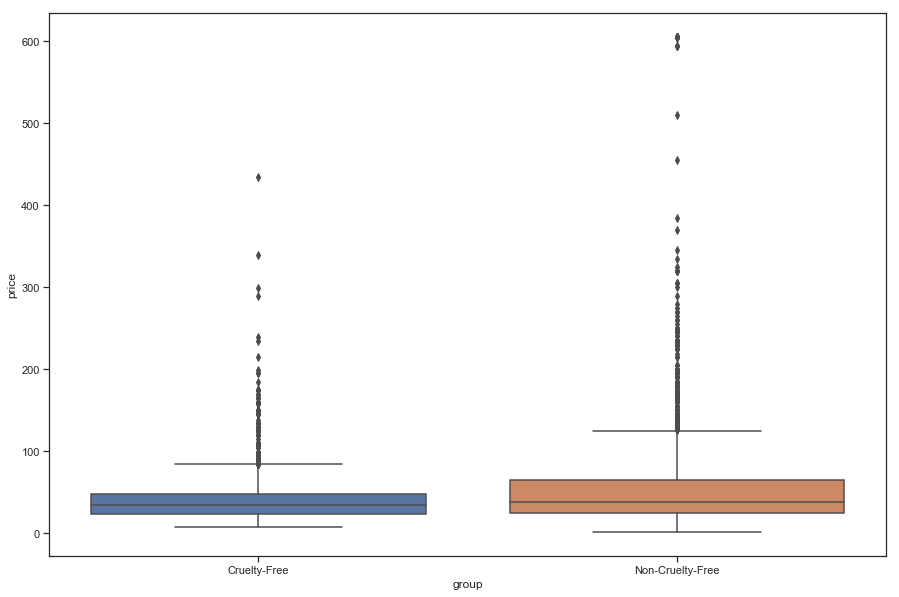

In [234]:
plt.figure(figsize=(15,10))
sns.boxplot(x="group", y="price", data=All)

In [235]:
groups = All[['group', 'price']]

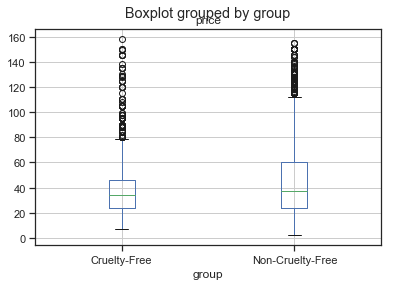

In [236]:
# remove outliers 
groups= groups.loc[(groups.price - groups.price.mean()).abs() / groups.price.std() < 2].boxplot('price','group')

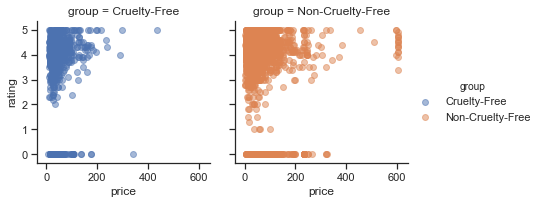

In [237]:
# Price vs rating
g = sns.FacetGrid(All, col="group",hue="group")
g.map(plt.scatter, "price", "rating", alpha=0.5)
g.add_legend()

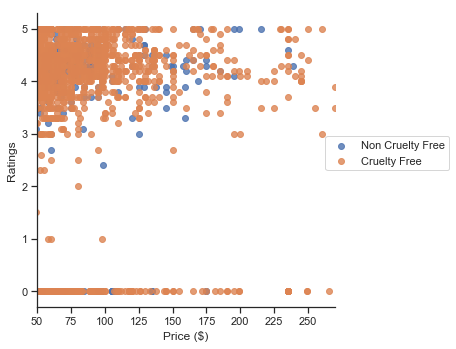

In [238]:
# Price vs rating
sns.lmplot("price", "rating", All, fit_reg=False, hue="group", palette="deep", legend=False)
plt.xlabel('Price ($)')
plt.ylabel('Ratings')
plt.xlim(50,270)
plt.legend(['Non Cruelty Free', 'Cruelty Free'], bbox_to_anchor=(1.4, 0.6))

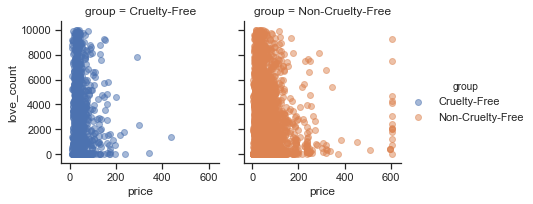

In [239]:
# price vs love counts
g = sns.FacetGrid(All, col="group",hue="group")
g.map(plt.scatter, "price", "love_count", alpha=0.5)
g.add_legend()

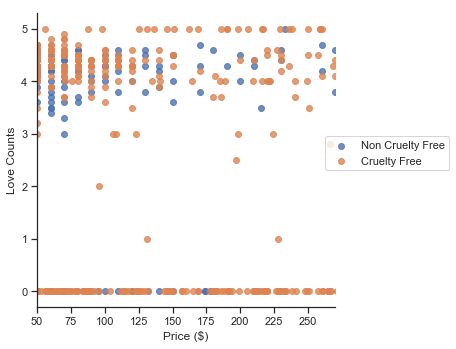

In [240]:
# price vs love counts
sns.lmplot("love_count", "rating", All, fit_reg=False, hue="group", palette="deep", legend=False)
plt.xlabel('Price ($)')
plt.ylabel('Love Counts')
plt.xlim(50,270)
plt.legend(['Non Cruelty Free', 'Cruelty Free'], bbox_to_anchor=(1.4, 0.6))

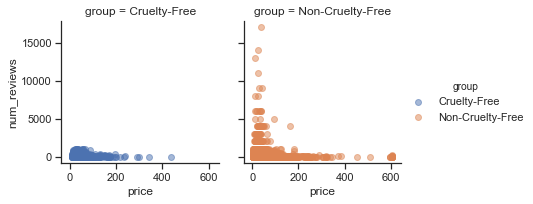

In [241]:
# Price and number of reviews
g = sns.FacetGrid(All, col="group",hue="group")
g.map(plt.scatter, "price", "num_reviews", alpha=0.5)
g.add_legend()

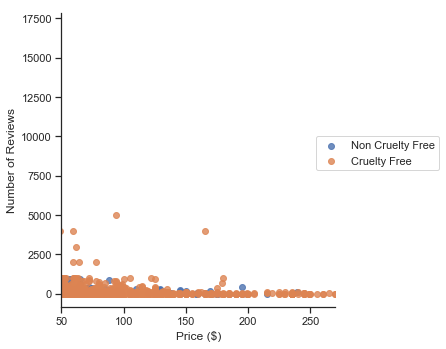

In [242]:
# Price and number of reviews
sns.lmplot("price", "num_reviews", All, fit_reg=False, hue="group", palette="deep", legend=False)
plt.xlabel('Price ($)')
plt.ylabel('Number of Reviews')
plt.xlim(50,270)
plt.legend(['Non Cruelty Free', 'Cruelty Free'], bbox_to_anchor=(1.4, 0.6))

In [243]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x720 with 0 Axes>

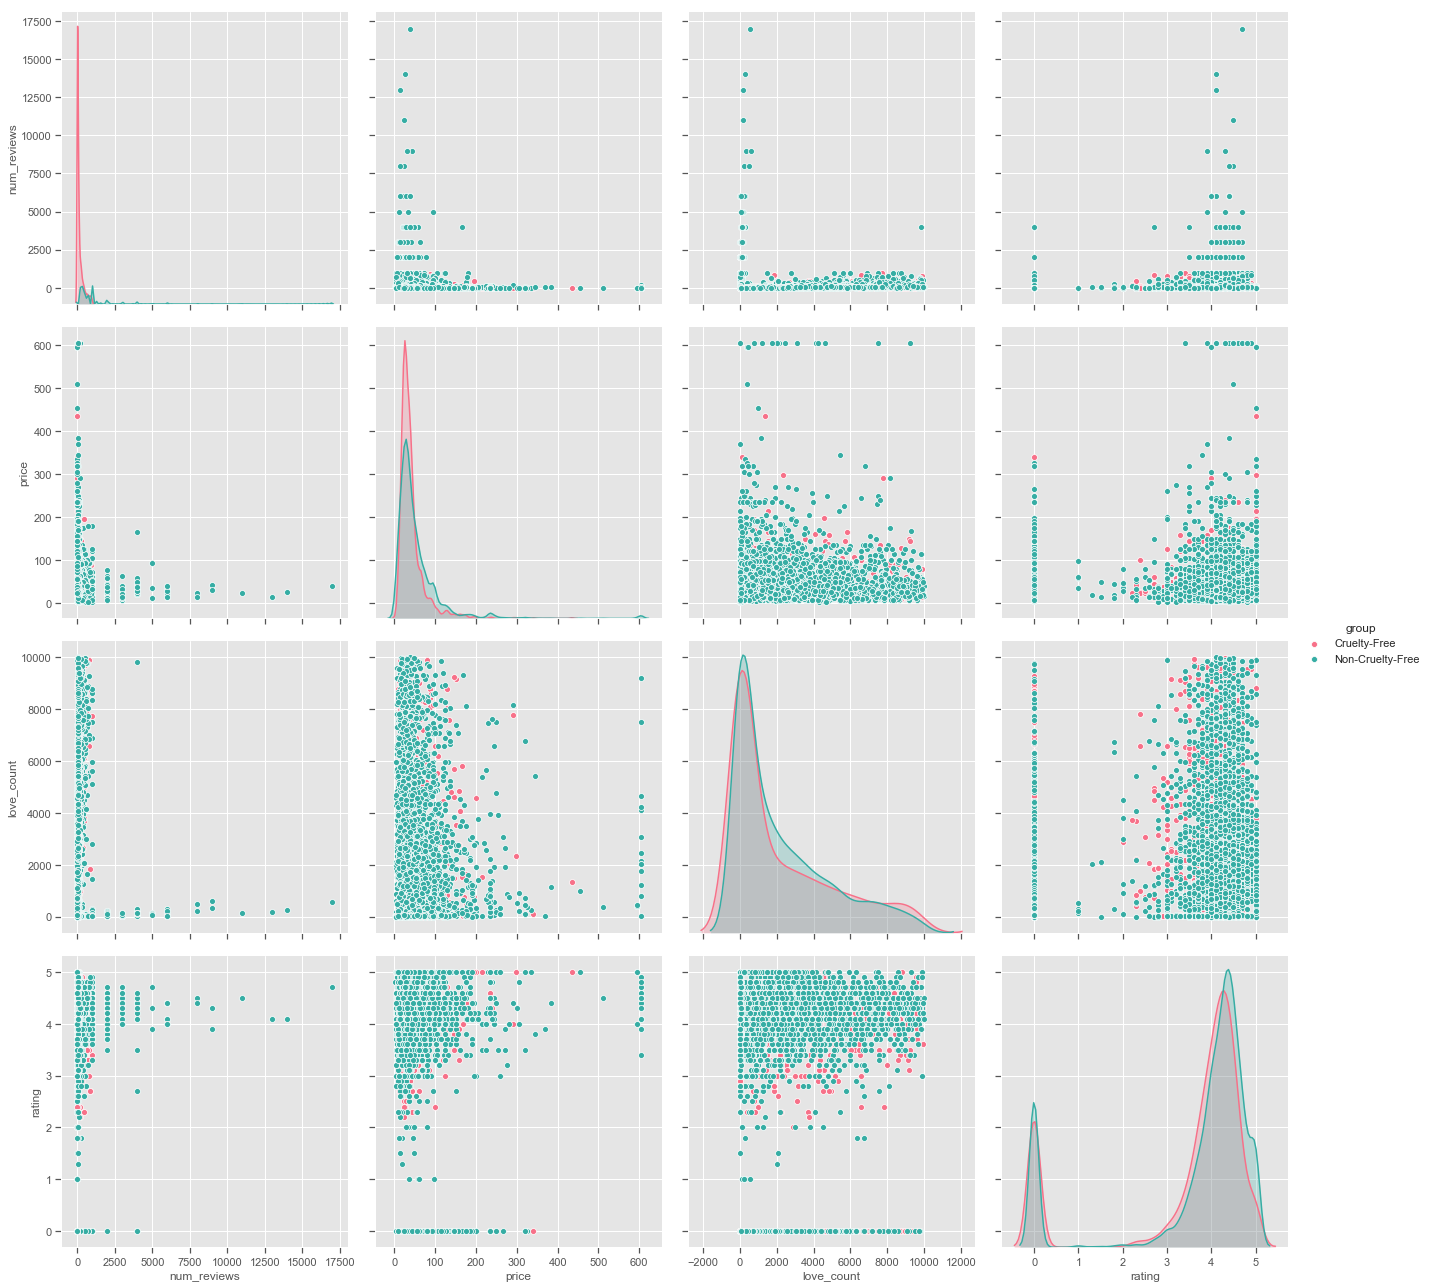

In [244]:
plt.figure(figsize=(15,10))
sns.pairplot(All, hue='group', size=4.5, palette="husl")

## Data Analysis- All

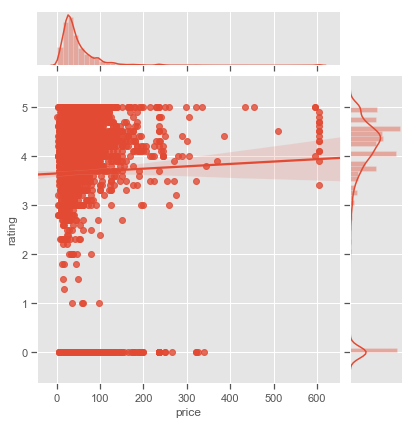

In [245]:
# price vs rating
sns.jointplot("price", "rating", data=All,kind='reg')

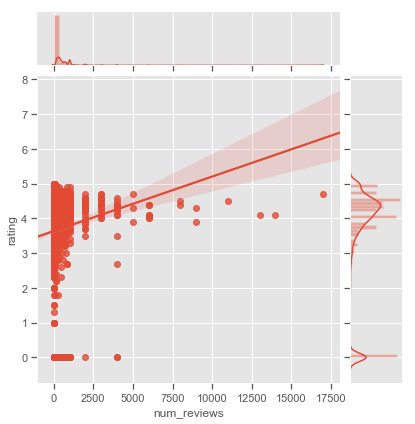

In [247]:
# number of reviews vs rating
sns.jointplot("num_reviews", "rating", data=All, kind='reg')

<Figure size 1080x720 with 0 Axes>

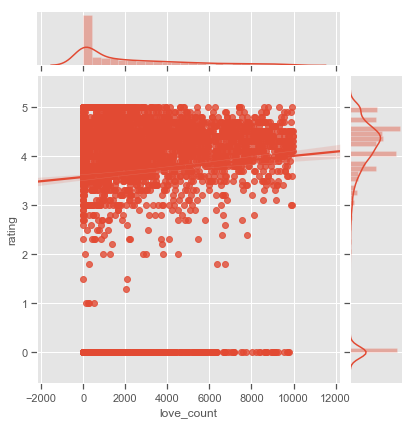

In [312]:
# love counts and rating
sns.jointplot("love_count","rating", data=All,kind='reg')

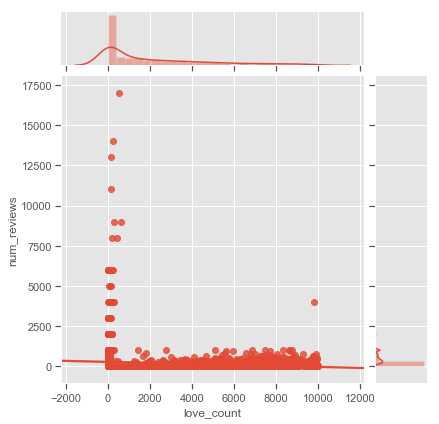

In [315]:
# love counts and number of reviews
sns.jointplot("love_count","num_reviews", data=All,kind='reg')

<Figure size 1080x720 with 0 Axes>

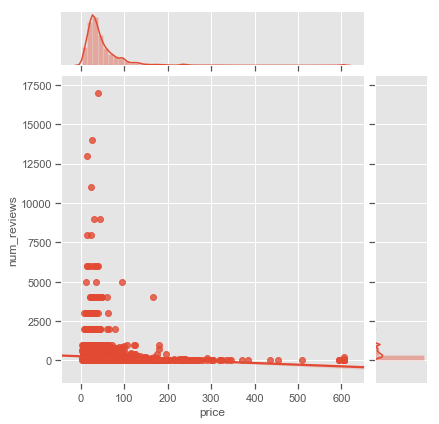

In [322]:
# price vs number of reviews
plt.figure(figsize=(15,10))
g=sns.jointplot("price","num_reviews", data=All, kind='reg')


# Find brand that is Cruelty-Free that is owned by Non-Cruelty-Free parent company ( Estee Lauder, Smashbox, Clinique and Bobbi Brown)

In [289]:
ESTEELAUDER= All[All['brand_name'].str.contains("LAUDER")]
SMASHBOX= All[All['brand_name'].str.contains("SMASHBOX")]
CLINIQUE=All[All['brand_name'].str.contains("CLINIQUE")]
BOBBIBROWN=All[All['brand_name'].str.contains("BOBBI BROWN")]
ex =pd.concat([ESTEELAUDER,SMASHBOX,CLINIQUE,BOBBIBROWN], axis=0)
ex.groupby('brand_name').agg(['mean', 'std'])

,brand_name,product_name,num_reviews,price,love_count,rating,category,category_1,category_2,group
1071,ESTÌäE LAUDER,Double Wear Stay-in-Place Foundation,4000,42,270,4.4,Makeup,Makeup,Foundation,Non-Cruelty-Free
1072,ESTÌäE LAUDER,Advanced Night Repair Synchronized Recovery Co...,11,168,9308,5.0,Skincare,Skincare,Face Serums,Non-Cruelty-Free
1073,ESTÌäE LAUDER,Advanced Night Repair Synchronized Recovery Co...,468,98,50,4.3,Skincare,Skincare,Face Serums,Non-Cruelty-Free
1074,ESTÌäE LAUDER,Advanced Night Repair Eye Supercharged Complex,171,62,4411,4.4,Skincare,Skincare,Eye Creams & Treatments,Non-Cruelty-Free
1075,ESTÌäE LAUDER,Protect + Hydrate Keep Glowing with Powerful P...,0,35,1797,0.0,Value & Gift Sets,Value & Gift Sets,Skincare,Non-Cruelty-Free
1076,ESTÌäE LAUDER,"Repair and Renew for Radiant, Youthful - Looki...",0,98,284,1.0,Value & Gift Sets,Value & Gift Sets,Skincare,Non-Cruelty-Free
1077,ESTÌäE LAUDER,"Revitalize + Glow for Firmer, Youthful-Looking...",0,88,458,0.0,Value & Gift Sets,Value & Gift Sets,NaN,Non-Cruelty-Free
1078,ESTÌäE LAUDER,Double Wear Maximum Cover Camouflage Makeup Fo...,220,42,10,4.0,Makeup,Makeup,Foundation,Non-Cruelty-Free
1079,ESTÌäE LAUDER,Double Wear Stay-In-Place Flawless Wear Concealer,257,28,20,4.3,Makeup,Makeup,Concealer,Non-Cruelty-Free
1080,ESTÌäE LAUDER,"Repair + Renew Wake Up to Radiant, Youthful-Lo...",1,35,1994,5.0,Value & Gift Sets,Value & Gift Sets,Skincare,Non-Cruelty-Free


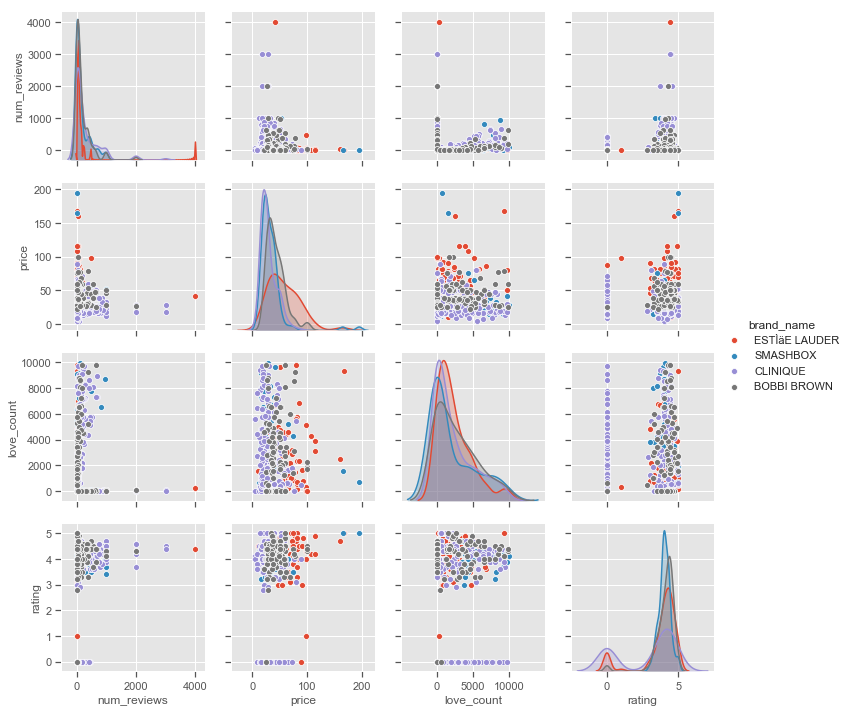

In [251]:
sns.pairplot(ex, hue="brand_name")

Text(0.5,1,'Pricing Distribution')

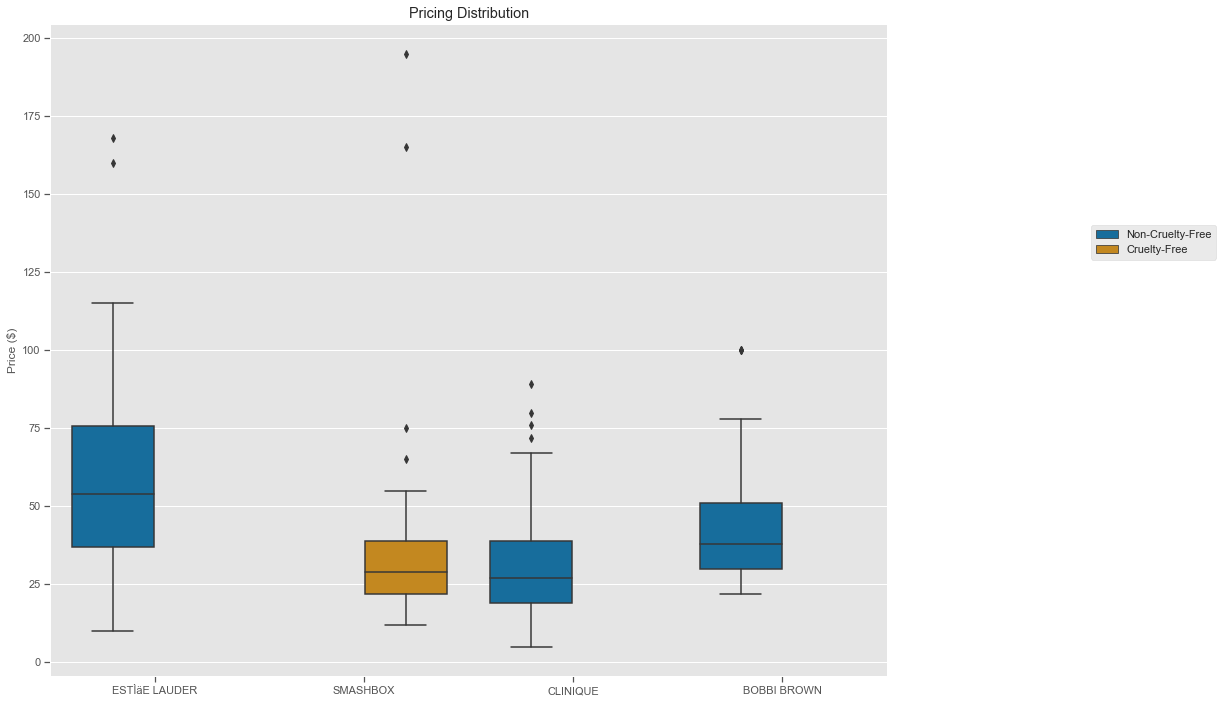

In [288]:
plt.figure(figsize=(15,12))
sns.boxplot(x="brand_name", y="price", hue="group", data=ex, palette='colorblind')
plt.xlabel('')
plt.ylabel('Price ($)')
plt.legend(bbox_to_anchor=(1.4, 0.7))
plt.title('Pricing Distribution')

# Find top five compaines that have the highest average product rating from each group (Cruelty-Free & Non-Cruelty-Free)

In [267]:
# find top five compaines that have the highest average product rating from Cruelty-Free group
topfiveCT=crueltyfree.groupby('brand_name').agg(['mean', 'std']).sort_values(("rating", "mean"), ascending=False).iloc[:5]


In [268]:
# find top five compaines that have the highest average product rating from Non-Cruelty-Free group
topfiveNCT=noncrueltyfree.groupby('brand_name').agg(['mean', 'std']).sort_values(("rating", "mean"), ascending=False).iloc[:5]

In [291]:
# combine Cruelty-Free & Non-Cruelty-Free
topfive=pd.concat([topfiveCT,topfiveNCT], axis=0)
topfive

num_reviews                   price              love_count  \
                     mean         std        mean        std         mean   
brand_name                                                                  
OLEHENRIKSEN   287.227273  324.186199   39.568182  20.589451  1993.340909   
OMOROVICZA      29.800000   61.458658  113.200000  45.297167  2117.320000   
TATCHA         141.758621  153.393205   59.379310  30.824867   183.000000   
HOURGLASS      160.454545  244.286602   45.287879  40.011831  2100.227273   
WANDER BEAUTY   38.285714   44.069690   30.428571   7.728871  2934.714286   
BVLGARI         60.040000   95.675876   69.360000  28.680539  1774.560000   
DOLCE&GABBANA  175.500000  391.900827   68.812500  28.029291  1832.375000   
LANEIGE        198.777778  536.790787   25.944444  10.703656  1952.055556   
CHANEL          37.653846   79.963444   91.461538  34.172263  2189.461538   
ALGENIST       115.228070  137.443887   67.280702  27.769944  3366.596491   

                              rating            
                       std      mean       std  
brand_name                                      
OLEHENRIKSEN   2944.644377  4.361364  0.292715  
OMOROVICZA     1573.190408  4.340000  1.004158  
TATCHA          666.554252  4.296552  0.322360  
HOURGLASS      2969.164388  4.272727  0.640564  
WANDER BEAUTY  2365.737343  4.157143  0.943763  
BVLGARI        2076.542701  4.592000  0.349905  
DOLCE&GABBANA  2293.725337  4.328125  1.180824  
LANEIGE        1992.100613  4.325000  0.403113  
CHANEL         2387.443004  4.294231  1.316027  
ALGENIST       2327.955793  4.192982  0.353987

In [294]:
topfive=topfive.reset_index()

In [299]:
lis=topfive['brand_name']

In [302]:
TOPFIVE=All[All["brand_name"].isin(lis)]

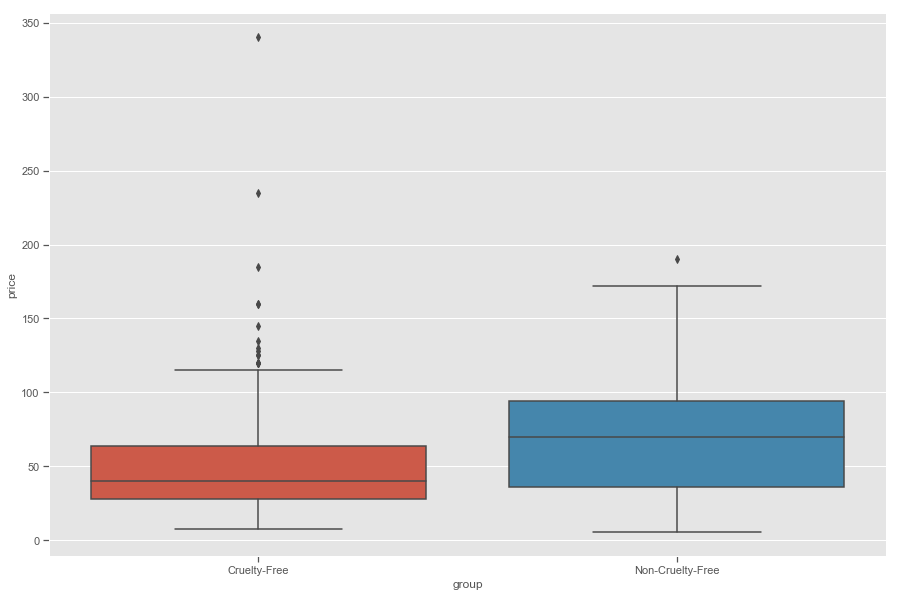

In [303]:
plt.figure(figsize=(15,10))
sns.boxplot(x="group", y="price", data=TOPFIVE)

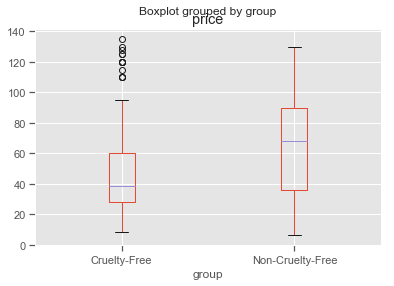

In [304]:
# remove outliers
topfivegroups= TOPFIVE[["group","price"]]
topfivegroups= topfivegroups.loc[(topfivegroups.price - topfivegroups.price.mean()).abs() / topfivegroups.price.std() < 2].boxplot('price','group')

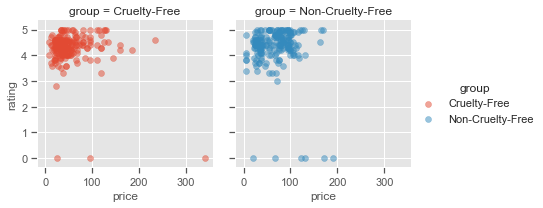

In [306]:
g = sns.FacetGrid(TOPFIVE, col="group",hue="group")
g.map(plt.scatter, "price", "rating", alpha=0.5)
g.add_legend()

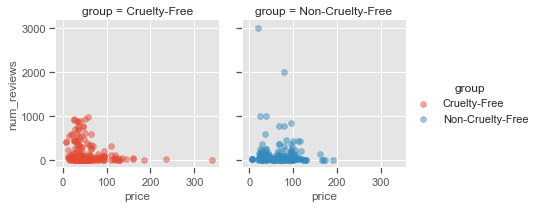

In [307]:
g = sns.FacetGrid(TOPFIVE, col="group",hue="group")
g.map(plt.scatter, "price", "num_reviews", alpha=0.5)
g.add_legend()

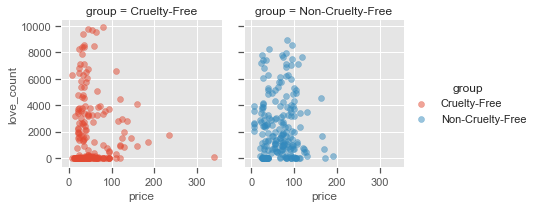

In [308]:
g = sns.FacetGrid(TOPFIVE, col="group",hue="group")
g.map(plt.scatter, "price", "love_count", alpha=0.5)
g.add_legend()

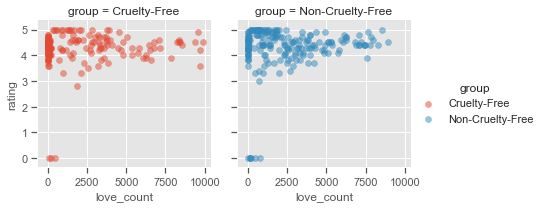

In [309]:
g = sns.FacetGrid(TOPFIVE, col="group",hue="group")
g.map(plt.scatter, "love_count", "rating", alpha=0.5)
g.add_legend()

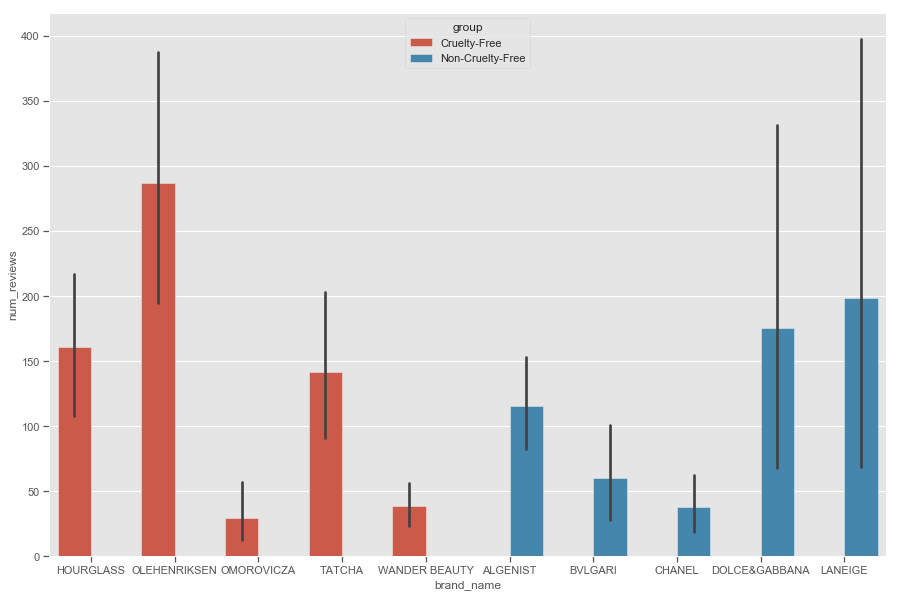

In [318]:
plt.figure(figsize=(15,10))
sns.barplot(x="brand_name", y="num_reviews", hue="group", data=TOPFIVE)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x720 with 0 Axes>

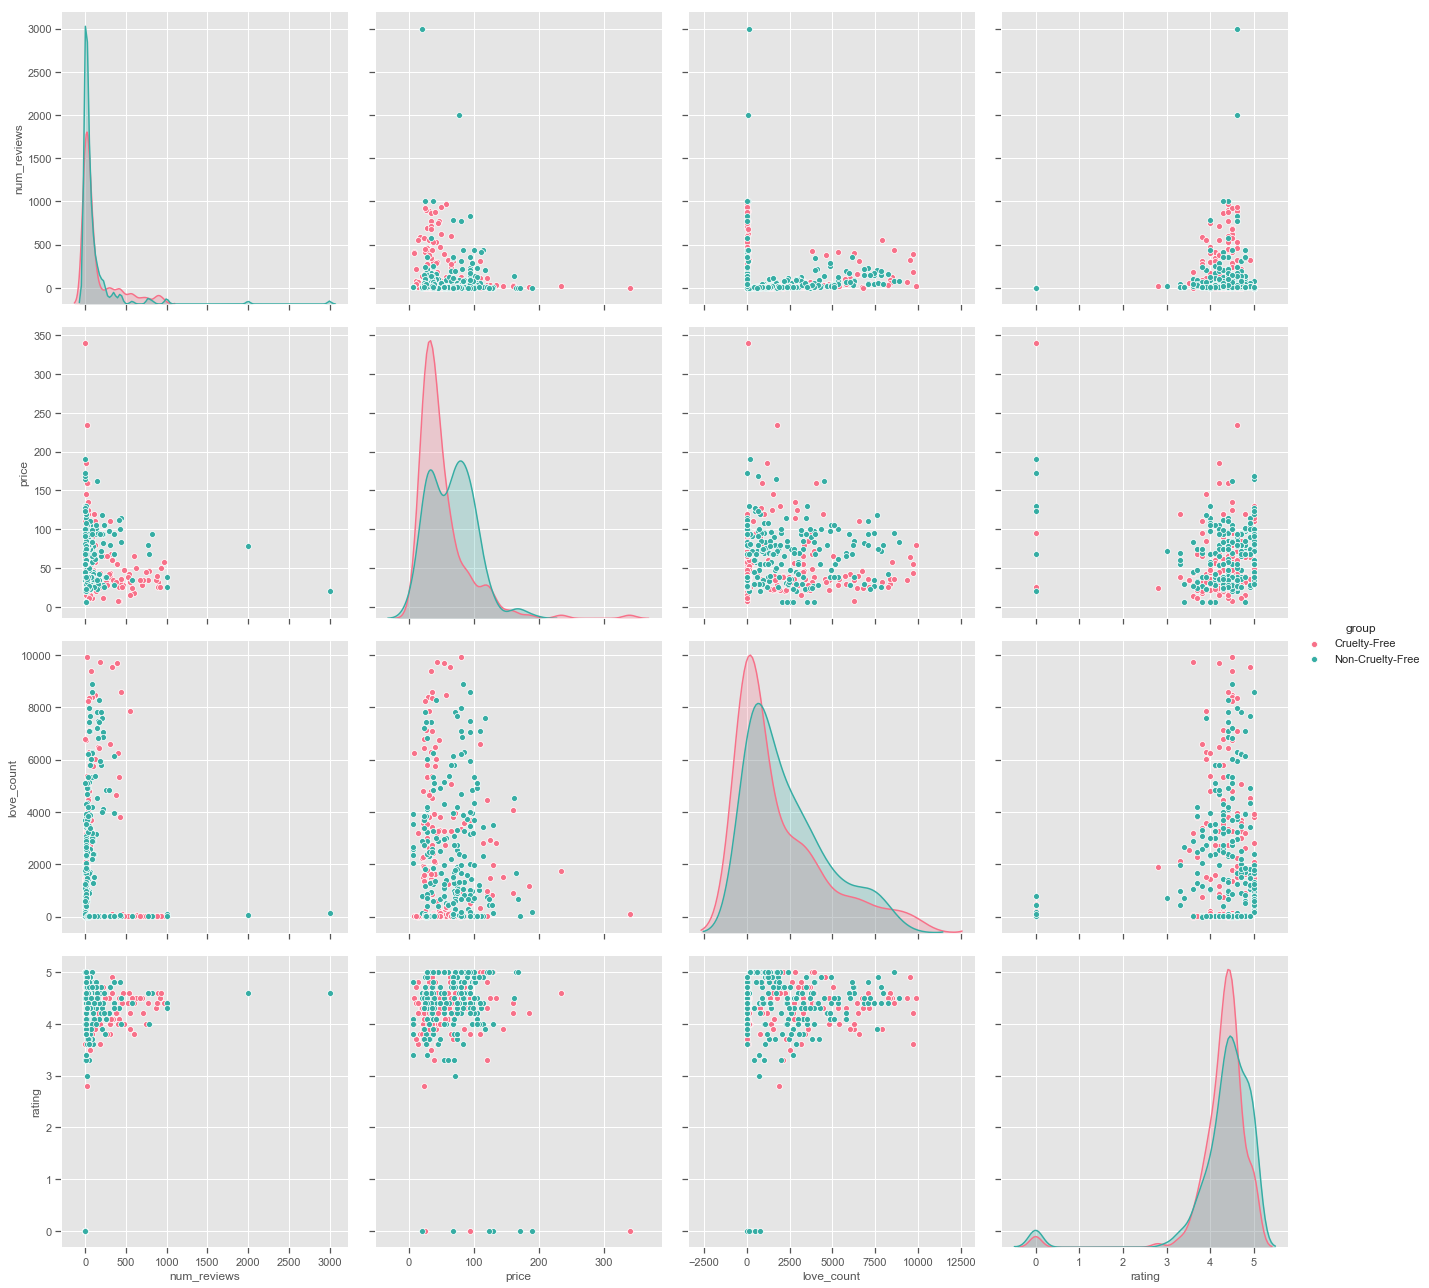

In [323]:
plt.figure(figsize=(15,10))
sns.pairplot(TOPFIVE, hue='group', size=4.5, palette="husl")